In [59]:
%%html
<style>.text_cell .rendered_html * {direction: rtl; text-align: right;}</style>

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math
import time


In [2]:
def readCsv(container, address):
    csvFile = open(address)
    csvData = csv.reader(csvFile)
    for i in csvData:
        container.append(list(map(int,i)))
    
X_train = pd.read_csv('Dataset/dataset/train_images.csv')
Y_train = pd.read_csv('Dataset/dataset/train_labels.csv')
X_test = pd.read_csv('Dataset/dataset/test_images.csv')
Y_test = pd.read_csv('Dataset/dataset/test_labels.csv')

X_train.drop('Unnamed: 0', 1, inplace = True)
Y_train.drop('Unnamed: 0', 1, inplace = True)
X_test.drop('Unnamed: 0', 1, inplace = True)
Y_test.drop('Unnamed: 0', 1, inplace = True)

محدوده از ۰ تا ۲۵۵ میباشد

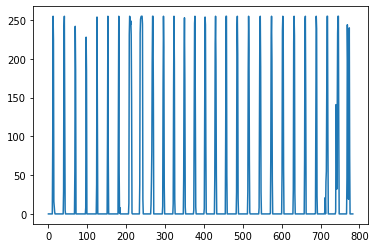

In [3]:
row = X_train.iloc[13].values.tolist()
plt.plot(range(28*28), row)
plt.show()

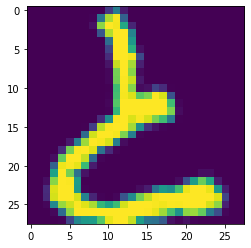

category :  19


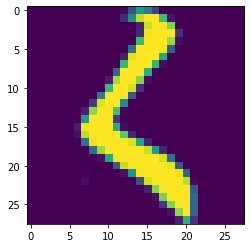

category :  7


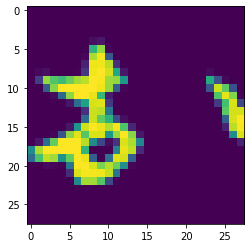

category :  4


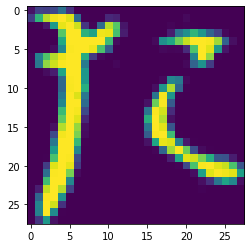

category :  15


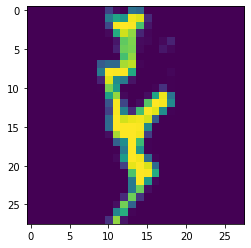

category :  12


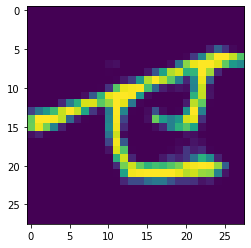

category :  13


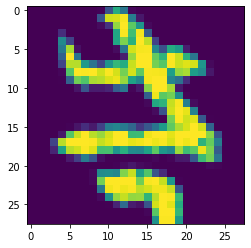

category :  10


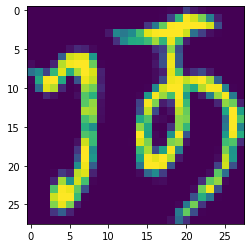

category :  0


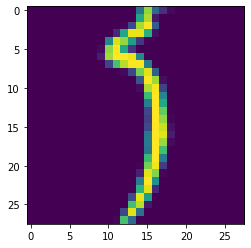

category :  2


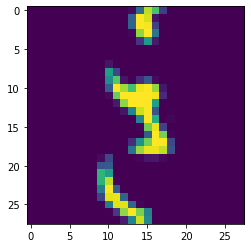

category :  6


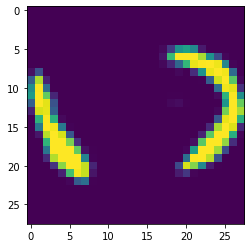

category :  1


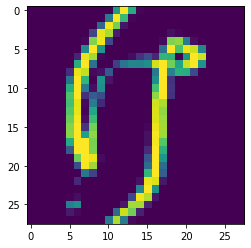

category :  8


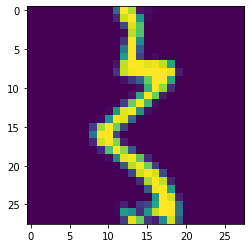

category :  18


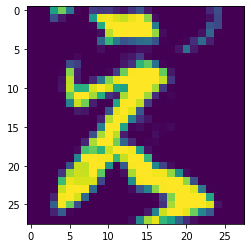

category :  3


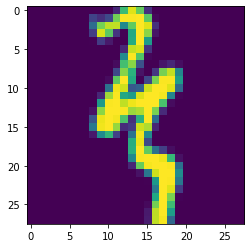

category :  14


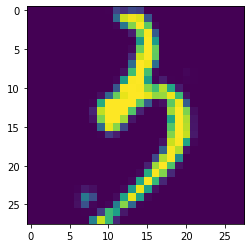

category :  5


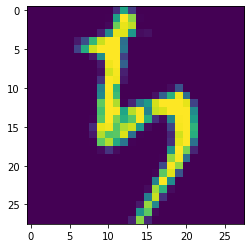

category :  16


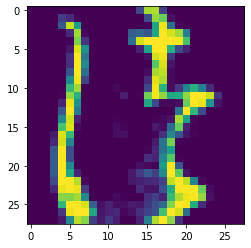

category :  17


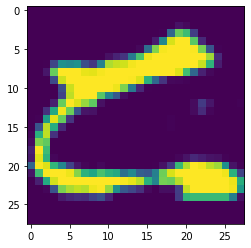

category :  9


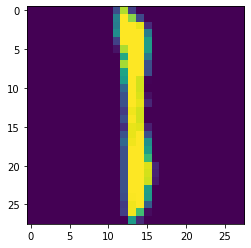

category :  11


In [4]:
row = X_train.iloc[0].values.tolist()
cat = [1]*20
for i, row in X_train.iterrows():
    row = row.values.tolist()
    this_cat = int(Y_train.iloc[i])
    if (cat[this_cat] == 0):
        continue
    cat[this_cat] = 0
    image = [[0 for i in range(28)] for j in range(28)]
    for p in range(len(row)):
        image[int(p/28)][int(p%28)] = row[p]
    plt.imshow(image)
    plt.show()
    print('category : ', this_cat)
    if (sum(cat) == 0):
        break

In [5]:
cat_val_test = Y_test.value_counts().to_dict()
test = {}
for key in cat_val_test:
    test[key[0]] = cat_val_test[key]
test_sorted = sorted(test.items())
test_cat = [i[0] for i in test_sorted]
test_val = [i[1] for i in test_sorted]


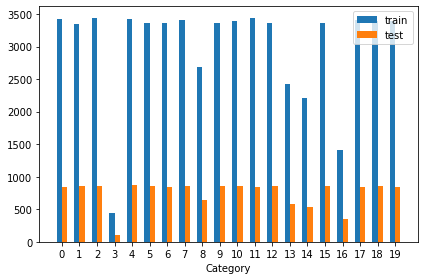

In [53]:
cat_val_train = Y_train.value_counts().to_dict()
train = {}
for key in cat_val_train:
    train[key[0]] = cat_val_train[key]
train_sorted = sorted(train.items())
train_cat = [i[0] for i in train_sorted]
train_val = [i[1] for i in train_sorted]

cat_val_test = Y_test.value_counts().to_dict()
test = {}
for key in cat_val_test:
    test[key[0]] = cat_val_test[key]
test_sorted = sorted(test.items())
test_cat = [i[0] for i in test_sorted]
test_val = [i[1] for i in test_sorted]

width = 0.3
fig, ax = plt.subplots()
ax.bar(np.arange(len(train_cat)) - width/2, train_val, width, label='train')
ax.bar(np.arange(len(test_cat)) + width/2, test_val, width, label='test')
ax.set_xlabel('Category')
ax.set_xticks(train_cat)
ax.legend()

fig.tight_layout()

plt.show()

In [7]:
Xtrain = X_train.to_numpy()
Ytrain = Y_train.to_numpy()
Xtest = X_test.to_numpy()
Ytest = Y_test.to_numpy()
Xtrain = Xtrain / 255
Xtest = Xtest / 255

اسکیل کردن داده ها موجب بالاتر رفتن سرعت یادگیری و بالاتر رفتن نرخ همگرایی میشود.
در غیر اینصورت موجب بالا رفتن وزن داده ها میشود و مدل ما 
unstable
خواهد شد؛
یعنی کارایی هنگام یادگیری پایین میآید و حساسیت نسبت به مقادیر داده ها بهم میریزد بنابراین خطای
generalization
افزایش پیدا میکند.
 

# Dataloader

In [8]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        onehot_vectors = []
        for i in range(len(labels)):
            row = [0 for k in range(n_classes)]
            row[labels[i][0]] = 1
            onehot_vectors.append(row)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        # TODO: Implement
        s = np.arange(len(self.__data))
        np.random.shuffle(s)
        self.__data = self.__data[s]
        self.__onehot_labels = self.__onehot_labels[s]
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [56]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        # TODO: Implement
        relu_value = np.matrix(matrix, dtype=float)#wat
        relu_value[relu_value < 0] = 0
        return relu_value

    def derivative(self, matrix):
        # TODO: Implement
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative >= 0] = 1.
        relu_derivative[relu_derivative < 0] = 0.
        
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
#         leaky_relu_value = np.matrix(matrix, dtype=float)        
#         leaky_relu_value[leaky_relu_value < 0] = np.array(leaky_relu_value[leaky_relu_value < 0])[0] * self.negative_slope
#         leaky_relu_value = np.where(leaky_relu_value > 0,leaky_relu_value, leaky_relu_value*self.negative_slope)
        leaky_relu_value = np.matrix(np.where(matrix > 0, matrix, matrix * self.negative_slope), dtype=float)        
        # TODO: Implement
        return leaky_relu_value

    def derivative(self, matrix):
        # TODO: Implement
        leacky_relu_derivative = np.matrix(matrix, dtype=float)
        leacky_relu_derivative[leacky_relu_derivative < 0] = self.negative_slope
        leacky_relu_derivative[leacky_relu_derivative >= 0] = 1.
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        sigmoid_value = np.matrix(matrix, dtype=float)        
        sigmoid_value = 1/(1 + np.exp(-sigmoid_value))
        return sigmoid_value

    def derivative(self, matrix):
        sigmoid_derivative = np.matrix(matrix, dtype=float)
        sigmoid_derivative = np.multiply(self.__val(sigmoid_derivative) , (1 - self.__val(sigmoid_derivative)))     
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        softmax_value = np.matrix(matrix, dtype=float)
        max_elements = np.max(softmax_value, axis=1)
        
        softmax_value -= max_elements
        softmax_value = np.exp(softmax_value)
        
        sum_of_rows = softmax_value.sum(axis=1)
        softmax_value = softmax_value/sum_of_rows
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        tanh_value = np.matrix(matrix, dtype=float)
#         tanh_value = (np.exp(tanh_value) - np.exp(-tanh_value))/(np.exp(tanh_value) + np.exp(-tanh_value))
        tanh_value = np.tanh(tanh_value)
        return tanh_value

    def derivative(self, matrix):
        # TODO: Implement
        tanh_derivative = np.matrix(matrix, dtype=float)
        tanh_derivative = 1 - np.multiply(self.__val(tanh_derivative),self.__val(tanh_derivative))
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

In [10]:
class CrossEntropy: #with softmax
    
    def __init__(self):
        self.softmax = Softmax()

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        size_x , size_y = np.shape(true_val)
        cross_entropy_value = np.matrix(np.full((size_x, 1), 0.))
        soft_out = self.softmax(true_val)
        cross_entropy_value = - (np.multiply(expected_val, np.log(soft_out)).sum(axis=1))
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        size_x , size_y = np.shape(true_val)
        cross_entropy_derivative = np.matrix(np.full((size_x , size_y), 0.))
        soft_out = self.softmax(true_val)
        cross_entropy_derivative = soft_out - expected_val    
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

In [11]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_input = layer_input
        self.__last_activation_input = np.matmul(self.__last_input, self.__weight) + self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        # TODO: Implement
        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        dL_dY = np.multiply(self.__last_activation_derivative, backprop_tensor)
        dL_dW = np.matmul(self.__last_input.T, dL_dY)
        ones = np.matrix(np.full(np.size(backprop_tensor,0),1.))
        dL_dB = np.matmul(ones, dL_dY)
        dL_dX = np.matmul(dL_dY, self.__weight.T)
        self.__weight = self.__weight - dL_dW * lr
        self.__bias = self.__bias - dL_dB * lr
        backprop_tensor = dL_dX
        # TODO: Implement
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
            
        weights = np.random.uniform(low=low, high=high, size = (dim1, dim2))
        weights = np.matrix(weights)
        # TODO: Implement
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
            
        weights = np.random.normal(loc=mean, scale=var, size = (dim1, dim2))
        weights = np.matrix(weights)
        # TODO: Implement
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [16]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        
        for layer in self.__layers_list:
            network_input = layer.forward(network_input)
            
        network_output = network_input
        # TODO: Implement
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        
        batch_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_output, y_batch)
        batch_average_loss = np.mean(self.__loss(batch_output, y_batch))
        self.__update_weights(batch_output, y_batch)
        # TODO: Implement
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        
        batch_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_output, y_batch)
        batch_average_loss = np.mean(self.__loss(batch_output, y_batch))
        # TODO: Implement
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        size_x, size_y = np.shape(outputs)
        labels = np.matrix(np.full((size_x,size_y), 0))
        for row in range(size_x):
            col_max = 0
            for col in range(size_y):
                if(outputs[row,col]>outputs[row,col_max]):
                    col_max = col
            labels[row,col_max] = 1
        # TODO: Implement
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        
        output = self.__get_labels(output)
        assert np.shape(output) == np.shape(expected_output), "outputs shape are not the same"
        size_x , size_y = np.shape(output)
        correct = 0
        
        for row in range(size_x):
            is_same = True
            for col in range(size_y):
                if(output[row,col] != expected_output[row,col]):
                    is_same = False
                    break
            if(is_same):
                correct += 1
        accuracy = (correct / size_x) * 100.
        # TODO: Implement
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        backprop_tensor = self.__loss.derivative(output, y_train)
        for i in range(len(self.__layers_list)-1, -1, -1):
            backprop_tensor = self.__layers_list[i].update_weights(backprop_tensor, self.__lr)
        # TODO: Implement
        return

# Training Sample Code

# ًقسمت دوم
## zero initialization:
اگر در ابتدای کار مقادیر وزنها را صفر (یا هر مقدار ثابت دیگر) قرار بدهیم،
به فرایند یادگیری هیچ کمکی نخواهد کرد؛ یعنی باعث میشود هر نورون همان محاسباتی که قبلا انجام داده است را تکرار کند و به خروجی های مشابه حالتهای قبلی دوباره برسد.
چرا که که برای هر
$w$
در
$W[l]$
مشتق ثابت میماند.

این مشکل بعنوان
network failing to break symmetry
نیز مطرح میشود.

# ًقسمت سوم
نتیجه به این ترتیب است که با بالا رفتن بیش از حد نرخ یادگیری، مدل طی هر دوره پیشرفتی نمیکند چون طول پرشها زیاد شده و ممکن است به مقادیر اوپتیموم برای وزنها هیچگاه نرسیم و آنها را رد کنیم و یادگیری بهینه رخ ندهد.
با پایین رفتن نرخ یادگیری ممکن است در نهایت به وزنهای ایده آل تری دست پیدا کنیم اما به همان میزان تعداد 
epoch
بیشتر باید باشد و یادگیری زمان طولانی تری را صرف میکند.

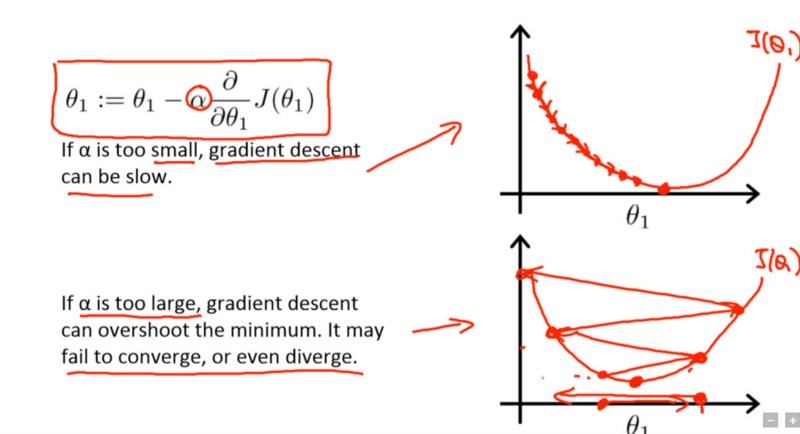

# ًقسمت چهارم
### Sigmoid & Tanh:
هر دو
بعلت داشتن مشکل 
vanishing gradient
مناسب نیستند.

 از آنجایی که ما از متدهای یادگیری وابسته به 
 gradient descent
 و 
back propagation
استفاده میکنیم،
مشکل بالا رخ میدهد.
این مشکل بدلیل اینکه گرادیان در این توابع به مقدار زیادی  
کوچک میشود،
و جلوی آپدیت شدن وزنها در لایه های آخر را میگیرد.

در پردازش تصویر از آنها معمولا استفاده نمیشود.
 
## Leaky Relu:
بعلت داشتن مقدار غیر ثابت برای مقادیر کوچکتر از صفر،
برخلاف 
Relu،
وجه تمایزی بین داده های قرار گرفته در قسمت منفی داریم
و 
Saturation
در این قسمت رخ نخواهد داد.
 

# ًقسمت پنجم
به این دلیل از 
batch
استفاده میشود که موجب بالا نرفتن بیش از حد پردازش ماشین و استفاده کمتر و بهینه تر از مموری،
میشود.
همچنین سرعت یادگیری افزایش میابد.

اما هرچقدر batch size
کمتر باشد،
gradient descent
دقت کمتری دارد و روی آپدیت کردن وزنها تاثیر میگذارد. 


# ًقسمت ششم

به این دلیل از
epoch
استفاده میشود که
به تعداد کافی وزنهای شبکه باید آپدیت شده تا
fitting
رخ دهد و به نقطه 
اوپتیمال برسد.

اما اگر تعداد 
epochها
بیش از حد باشند،
مدل روی داده های 
training،
overfit
میشود و باعث میشود که 
test accuracy
پایین بیاید.

راه حل آن،
early stopping
است که با توجه به میزان تغییرات
Loss Function
روی داده های 
training
تشخیص میدهد که باید متوقف شود.
البته با زیرنظر داشتن 
test accuracy
در هر 
epoch
هم میتوانیم نقطه 
overfitting
را تشخیص بدهیم.

# First run

In [17]:
tock = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=64, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=64, shuffle=False)


network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, activation=Relu(), weight_initializer='normal')
# network.add_layer(40, activation=Relu(), weight_initializer='normal')
# network.add_layer(20, activation=Relu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

tick = time.time()
print("elapsed time = %s seconds" % (finish_time - start_time))


Epoch 1:
	Train: Average Accuracy: 20.325826226012794	Average Loss: 2.479213453413258
	Test: Average Accuracy: 37.211879432624116	Average Loss: 2.0566457324908805
Epoch 2:
	Train: Average Accuracy: 62.3150986140725	Average Loss: 1.2765967729794254
	Test: Average Accuracy: 60.18617021276596	Average Loss: 1.3629246249896882
Epoch 3:
	Train: Average Accuracy: 74.18710021321962	Average Loss: 0.9011686582293813
	Test: Average Accuracy: 66.24778368794327	Average Loss: 1.176162078671323
Epoch 4:
	Train: Average Accuracy: 78.57142857142857	Average Loss: 0.7462144004199952
	Test: Average Accuracy: 70.72695035460994	Average Loss: 1.0360023303121468
Epoch 5:
	Train: Average Accuracy: 81.8263592750533	Average Loss: 0.6353606219685024
	Test: Average Accuracy: 73.37765957446808	Average Loss: 0.936133354120968
Epoch 6:
	Train: Average Accuracy: 83.94689498933901	Average Loss: 0.5585076664987203
	Test: Average Accuracy: 75.0	Average Loss: 0.8763364880634241
Epoch 7:
	Train: Average Accuracy: 85.467750

# Learning rate * 10

In [18]:
start_time = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001 * 10
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=64, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=64, shuffle=False)
network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

finish_time = time.time()
print("elapsed time = %s seconds" % (finish_time - start_time))


Epoch 1:
	Train: Average Accuracy: 5.533715351812367	Average Loss: 2.9622682224325882
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.950337326115915
Epoch 2:
	Train: Average Accuracy: 5.553704690831556	Average Loss: 2.951613541864421
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.9503347277419087
Epoch 3:
	Train: Average Accuracy: 5.553704690831556	Average Loss: 2.951613426945283
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.9503347046049266
Epoch 4:
	Train: Average Accuracy: 5.553704690831556	Average Loss: 2.951613426095649
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.9503347043741077
Epoch 5:
	Train: Average Accuracy: 5.553704690831556	Average Loss: 2.9516134260871913
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.950334704371803
Epoch 6:
	Train: Average Accuracy: 5.553704690831556	Average Loss: 2.951613426087108
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.9503347043717794
Epoch 7:
	Train: Average Accuracy:

# Learning rate / 10

In [19]:
start_time = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001 / 10
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=64, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=64, shuffle=False)
network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Relu(), weight_initializer='normaEpoch 1:
	Train: Average Accuracy: 44.446476063829785	Average Loss: 2.033070679438355
	Test: Average Accuracy: 59.01573650758252	Average Loss: 1.4176372217515538
Epoch 2:l')
network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

finish_time = time.time()
print("elapsed time = %s seconds" % (finish_time - start_time))


Epoch 1:
	Train: Average Accuracy: 5.746934968017057	Average Loss: 2.941013099908931
	Test: Average Accuracy: 6.493794326241134	Average Loss: 2.939519258143707
Epoch 2:
	Train: Average Accuracy: 6.624800106609808	Average Loss: 2.920193851915513
	Test: Average Accuracy: 8.515070921985815	Average Loss: 2.9224114444621
Epoch 3:
	Train: Average Accuracy: 8.993536780383796	Average Loss: 2.8937382982615336
	Test: Average Accuracy: 12.66622340425532	Average Loss: 2.8856994313470414
Epoch 4:
	Train: Average Accuracy: 16.527851812366738	Average Loss: 2.695801874892311
	Test: Average Accuracy: 16.86613475177305	Average Loss: 2.5402328240613996
Epoch 5:
	Train: Average Accuracy: 21.197028251599146	Average Loss: 2.393323482431712
	Test: Average Accuracy: 18.956117021276597	Average Loss: 2.456509622739901
Epoch 6:
	Train: Average Accuracy: 23.76898987206823	Average Loss: 2.313069015916022
	Test: Average Accuracy: 21.139184397163124	Average Loss: 2.3987534964896655
Epoch 7:
	Train: Average Accuracy:

In [20]:
tick = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=64, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=64, shuffle=False)
network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Sigmoid(), weight_initializer='normal')
network.add_layer(40, activation=Sigmoid(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

tock = time.time()
print("elapsed time = %s seconds" % (tock - tick))


Epoch 1:
	Train: Average Accuracy: 5.680303837953092	Average Loss: 2.9551622963788318
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.953266833893754
Epoch 2:
	Train: Average Accuracy: 5.738606076759062	Average Loss: 2.9536808472471807
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.9524286712896504
Epoch 3:
	Train: Average Accuracy: 5.810234541577826	Average Loss: 2.9527564750573676
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.9514923385596483
Epoch 4:
	Train: Average Accuracy: 6.011793710021322	Average Loss: 2.951302785959423
	Test: Average Accuracy: 5.680407801418441	Average Loss: 2.9497111994603324
Epoch 5:
	Train: Average Accuracy: 6.703091684434968	Average Loss: 2.9475072846191446
	Test: Average Accuracy: 7.056737588652483	Average Loss: 2.944945058020396
Epoch 6:
	Train: Average Accuracy: 8.7886460554371	Average Loss: 2.935961291621569
	Test: Average Accuracy: 8.251329787234043	Average Loss: 2.9283046786915197
Epoch 7:
	Train: Average Accuracy:

In [24]:
tick = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=64, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=64, shuffle=False)
network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Tanh(), weight_initializer='normal')
network.add_layer(40, activation=Tanh(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

tock = time.time()
print("elapsed time = %s seconds" % (tock - tick))


Epoch 1:
	Train: Average Accuracy: 5.7336087420042645	Average Loss: 2.953789334293348
	Test: Average Accuracy: 5.873226950354611	Average Loss: 2.949930045917618
Epoch 2:
	Train: Average Accuracy: 7.299440298507463	Average Loss: 2.9380105197137056
	Test: Average Accuracy: 9.122340425531915	Average Loss: 2.8639193599281216
Epoch 3:
	Train: Average Accuracy: 20.653984541577824	Average Loss: 2.379804946616465
	Test: Average Accuracy: 23.548315602836876	Average Loss: 2.2910227612316936
Epoch 4:
	Train: Average Accuracy: 39.77545309168443	Average Loss: 1.8313867334698972
	Test: Average Accuracy: 40.50088652482269	Average Loss: 1.9111357787944805
Epoch 5:
	Train: Average Accuracy: 57.34108475479744	Average Loss: 1.4140163180011847
	Test: Average Accuracy: 51.090425531914896	Average Loss: 1.649706342170049
Epoch 6:
	Train: Average Accuracy: 65.49840085287846	Average Loss: 1.1492390508307981
	Test: Average Accuracy: 56.850620567375884	Average Loss: 1.4531807561013717
Epoch 7:
	Train: Average Ac

In [58]:
tick = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=64, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=64, shuffle=False)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(40, activation=LeakyRelu(), weight_initializer='normal')
# network.add_layer(40, activation=LeakyRelu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

tock = time.time()
print("elapsed time = %s seconds" % (tock - tick))


Epoch 1:
	Train: Average Accuracy: 58.482142857142854	Average Loss: 1.5007915888099
	Test: Average Accuracy: 62.932180851063826	Average Loss: 1.336016385323122
Epoch 2:
	Train: Average Accuracy: 75.17157515991471	Average Loss: 0.9038148772949828
	Test: Average Accuracy: 66.59574468085107	Average Loss: 1.2148171527035212
Epoch 3:
	Train: Average Accuracy: 77.75019989339019	Average Loss: 0.8166259388902096
	Test: Average Accuracy: 67.82358156028369	Average Loss: 1.1662520578730493
Epoch 4:
	Train: Average Accuracy: 78.88792643923242	Average Loss: 0.7741037917682326
	Test: Average Accuracy: 68.51063829787235	Average Loss: 1.142921132050224
Epoch 5:
	Train: Average Accuracy: 79.43596748400853	Average Loss: 0.7540091248342529
	Test: Average Accuracy: 68.58377659574468	Average Loss: 1.1332994742950633
Epoch 6:
	Train: Average Accuracy: 79.60920842217485	Average Loss: 0.7456247230233743
	Test: Average Accuracy: 68.74113475177305	Average Loss: 1.1322446492642564
Epoch 7:
	Train: Average Accura

In [43]:
start_time = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=16, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=16, shuffle=False)


network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

finish_time = time.time()
print("elapsed time = %s seconds" % (finish_time - start_time))


Epoch 1:
	Train: Average Accuracy: 21.19	Average Loss: 2.4616222694002405
	Test: Average Accuracy: 41.47121535181237	Average Loss: 1.992116554806602
Epoch 2:
	Train: Average Accuracy: 63.65	Average Loss: 1.2504293136839968
	Test: Average Accuracy: 60.167910447761194	Average Loss: 1.4063657083767758
Epoch 3:
	Train: Average Accuracy: 73.80666666666667	Average Loss: 0.9195537753324039
	Test: Average Accuracy: 65.91817697228144	Average Loss: 1.2107808008903158
Epoch 4:
	Train: Average Accuracy: 77.93666666666667	Average Loss: 0.7706280906671659
	Test: Average Accuracy: 69.75613006396588	Average Loss: 1.0828027556129536
Epoch 5:
	Train: Average Accuracy: 80.97166666666666	Average Loss: 0.6696524610610206
	Test: Average Accuracy: 72.04824093816632	Average Loss: 0.9881149123264464
Epoch 6:
	Train: Average Accuracy: 83.00333333333333	Average Loss: 0.5955446577266591
	Test: Average Accuracy: 73.96721748400853	Average Loss: 0.9228845306889185
Epoch 7:
	Train: Average Accuracy: 84.605	Average Lo

In [44]:
tick = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=32, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=32, shuffle=False)


network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

tock = time.time()
print("elapsed time = %s seconds" % (tock - tick))


Epoch 1:
	Train: Average Accuracy: 22.323333333333334	Average Loss: 2.4239823474885975
	Test: Average Accuracy: 42.450692963752665	Average Loss: 1.944061716295956
Epoch 2:
	Train: Average Accuracy: 63.42166666666667	Average Loss: 1.2386280903972793
	Test: Average Accuracy: 59.65707178393746	Average Loss: 1.3925123305630178
Epoch 3:
	Train: Average Accuracy: 73.20666666666666	Average Loss: 0.9238987275468353
	Test: Average Accuracy: 65.75826226012794	Average Loss: 1.20371170326013
Epoch 4:
	Train: Average Accuracy: 77.65166666666667	Average Loss: 0.7744823617557711
	Test: Average Accuracy: 69.77611940298507	Average Loss: 1.0746593282059016
Epoch 5:
	Train: Average Accuracy: 80.90333333333334	Average Loss: 0.6661045028857762
	Test: Average Accuracy: 71.863894811656	Average Loss: 0.9946585375447133
Epoch 6:
	Train: Average Accuracy: 83.12833333333333	Average Loss: 0.5891177032073831
	Test: Average Accuracy: 73.40307391613361	Average Loss: 0.9299469182425988
Epoch 7:
	Train: Average Accura

In [60]:
tick = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 20
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=256, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=256, shuffle=False)


network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

tock = time.time()
print("elapsed time = %s seconds" % (tock - tick))


Epoch 1:
	Train: Average Accuracy: 44.446476063829785	Average Loss: 2.033070679438355
	Test: Average Accuracy: 59.01573650758252	Average Loss: 1.4176372217515538
Epoch 2:
	Train: Average Accuracy: 73.97218528368793	Average Loss: 0.9182356654625693
	Test: Average Accuracy: 67.74120483942909	Average Loss: 1.1656853543637817
Epoch 3:
	Train: Average Accuracy: 79.02870124113474	Average Loss: 0.7555642904296689
	Test: Average Accuracy: 70.74075880909902	Average Loss: 1.070966092177705
Epoch 4:
	Train: Average Accuracy: 81.37466755319149	Average Loss: 0.6741619908982883
	Test: Average Accuracy: 72.16910124888493	Average Loss: 1.0124564800165012
Epoch 5:
	Train: Average Accuracy: 82.97595301418441	Average Loss: 0.6193202048262739
	Test: Average Accuracy: 73.27685938893845	Average Loss: 0.9693085415717023
Epoch 6:
	Train: Average Accuracy: 84.05917553191489	Average Loss: 0.5776277691969713
	Test: Average Accuracy: 74.20585693577164	Average Loss: 0.9362733751318306
Epoch 7:
	Train: Average Accu

In [47]:
tick = time.time()

INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 60
TRAINLOADER = Dataloader(Xtrain, Ytrain, 20, batch_size=64, shuffle=False)
TESTLOADER = Dataloader(Xtest, Ytest, 20, batch_size=64, shuffle=False)


network = FeedForwardNN(INPUT_SHAPE)
# network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(40, activation=Relu(), weight_initializer='normal')
network.add_layer(20, activation=Identical(), weight_initializer='normal')
network.set_training_param(CrossEntropy(), LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

tock = time.time()
print("elapsed time = %s seconds" % (finish_time - start_time))


Epoch 1:
	Train: Average Accuracy: 19.06816364605544	Average Loss: 2.5038087222379386
	Test: Average Accuracy: 34.862588652482266	Average Loss: 2.055855550757105
Epoch 2:
	Train: Average Accuracy: 58.95355810234542	Average Loss: 1.3520797030971239
	Test: Average Accuracy: 58.45744680851064	Average Loss: 1.4146164764992848
Epoch 3:
	Train: Average Accuracy: 73.30923507462687	Average Loss: 0.9219251797506987
	Test: Average Accuracy: 65.86214539007092	Average Loss: 1.1856888678953839
Epoch 4:
	Train: Average Accuracy: 77.97674573560768	Average Loss: 0.7584904895281022
	Test: Average Accuracy: 69.17774822695036	Average Loss: 1.066756144417526
Epoch 5:
	Train: Average Accuracy: 81.21835021321962	Average Loss: 0.6489772372860484
	Test: Average Accuracy: 72.14095744680851	Average Loss: 0.9717038326445323
Epoch 6:
	Train: Average Accuracy: 83.50712953091684	Average Loss: 0.5713920150963764
	Test: Average Accuracy: 74.36835106382979	Average Loss: 0.8952445667513743
Epoch 7:
	Train: Average Accu

	Test: Average Accuracy: 80.16179078014186	Average Loss: 1.0189357036229902
Epoch 52:
	Train: Average Accuracy: 96.0804237739872	Average Loss: 0.14426279473209142
	Test: Average Accuracy: 80.14849290780143	Average Loss: 1.0372244120810752
Epoch 53:
	Train: Average Accuracy: 96.06709754797441	Average Loss: 0.14296054306698955
	Test: Average Accuracy: 80.11524822695037	Average Loss: 1.046635088062088
Epoch 54:
	Train: Average Accuracy: 96.23200959488273	Average Loss: 0.13937659705997027
	Test: Average Accuracy: 80.10859929078015	Average Loss: 1.0618411855653518
Epoch 55:
	Train: Average Accuracy: 96.32362739872069	Average Loss: 0.13713422087147886
	Test: Average Accuracy: 79.90913120567377	Average Loss: 1.0832067845246498
Epoch 56:
	Train: Average Accuracy: 96.34694829424308	Average Loss: 0.13514605442323138
	Test: Average Accuracy: 80.08865248226951	Average Loss: 1.0839315935725846
Epoch 57:
	Train: Average Accuracy: 96.488539445629	Average Loss: 0.13257368783211548
	Test: Average Accur

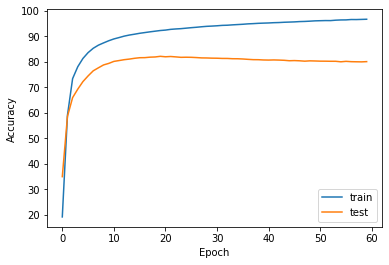

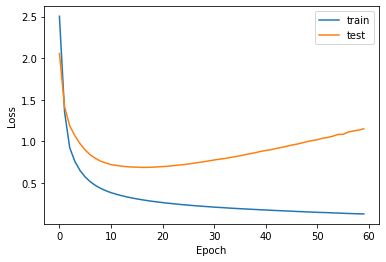

In [51]:
plt.plot(log['train_accuracy'], label = 'train')
plt.plot(log['test_accuracy'], label = 'test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(log['train_loss'], label = 'train')
plt.plot(log['test_loss'], label = 'test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
